## Cell Segmentation

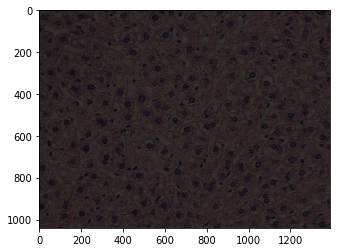

In [41]:
#import image as np.array and display
import matplotlib.pyplot as plt
from skimage import color, util

img = plt.imread('/Users/kenxiong/Downloads/6M_AL_Female/AMC-24--001-macurato.tif')

plt.imshow(img)


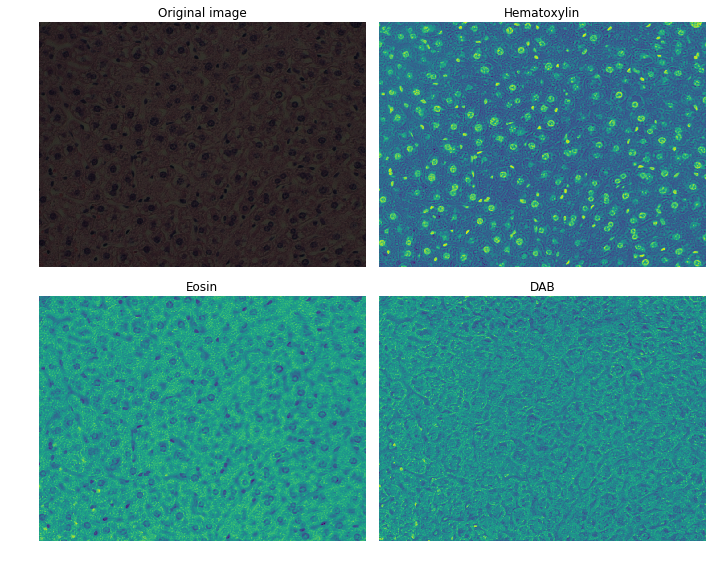

In [44]:
'''A. C. Ruifrok and D. A. Johnston, “Quantification of histochemical staining by color deconvolution.,” Analytical and quantitative cytology and histology / the International Academy of Cytology [and] American Society of Cytology, vol. 23, no. 4, pp. 291-9, Aug. 2001.
'''

img_hed = color.rgb2hed(img)

img_hema = img_hed[:, :, 0]
img_eosin = img_hed[:, :, 1]
img_dab = img_hed[:, :, 2]

fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(img)
ax[0].set_title("Original image")

ax[1].imshow(img_hema)
ax[1].set_title("Hematoxylin")

ax[2].imshow(img_eosin)
ax[2].set_title("Eosin")

ax[3].imshow(img_dab)
ax[3].set_title("DAB")

for a in ax.ravel():
    a.axis('off')

fig.tight_layout()

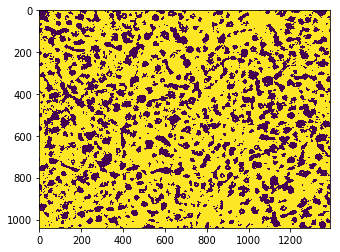

In [63]:
from skimage import filters, feature
import numpy as np

def min_max_normalize(i):
    return (i - np.min(i)) / (np.max(i) - np.min(i))
    
norm_eosin = min_max_normalize(img_eosin)
smooth_norm_eosin = filters.gaussian(norm_eosin, sigma=2)

cyto_thresh = filters.threshold_otsu(smooth_norm_eosin)

binary_eosin = (smooth_norm_eosin > cyto_thresh)

plt.imshow(binary_eosin)
#plt.hist(np.ravel(norm_hema), 100)
#plt.axvline(thresh, color='red')


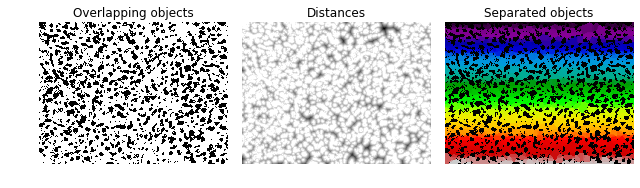

In [64]:
from scipy import ndimage as ndi

from skimage.morphology import watershed
from skimage.feature import peak_local_max

distance = ndi.distance_transform_edt(binary_eosin)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)),
                            labels=binary_eosin)
markers = ndi.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=binary_eosin)

fig3, axes3 = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True)
ax3 = axes3.ravel()

ax3[0].imshow(binary_eosin, cmap=plt.cm.gray, interpolation='nearest')
ax3[0].set_title('Overlapping objects')
ax3[1].imshow(-distance, cmap=plt.cm.gray, interpolation='nearest')
ax3[1].set_title('Distances')
ax3[2].imshow(labels, cmap=plt.cm.nipy_spectral, interpolation='nearest')
ax3[2].set_title('Separated objects')

for a in ax3:
    a.set_axis_off()

fig3.tight_layout()
plt.show()